In [1]:
import numpy as np
import cv2 
import os
import matplotlib.pyplot as plt

In [3]:
directory = "/home/ajvalenc/Datasets/spectronix/thermal/fire/flames"
filenames = os.listdir(directory)

In [4]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 90;

# Filter by Area.
params.filterByArea = True
params.minArea = 1

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)

In [103]:
def show_image(image, title=None, normalize=False):

    # rescale (16-bit image only) see method 2 https://answers.opencv.org/question/207313/conversion-16bit-image-to-8-bit-image/
    if normalize:
        image = cv2.normalize(image, None, 0, 255, norm_type=cv2.NORM_MINMAX) 

    if image.dtype == np.uint16:
        image = np.uint8(image)

    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    if title is not None:
        plt.title(title)

    plt.show()


A (480, 640)
B (480, 640, 3)


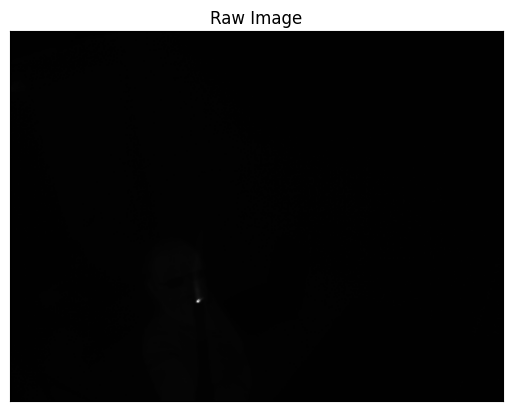

In [106]:
image = cv2.imread(directory + "/" + filenames[0], cv2.IMREAD_ANYDEPTH)
show_image(image, "Raw Image", True)

A (480, 640)
B (480, 640, 3)


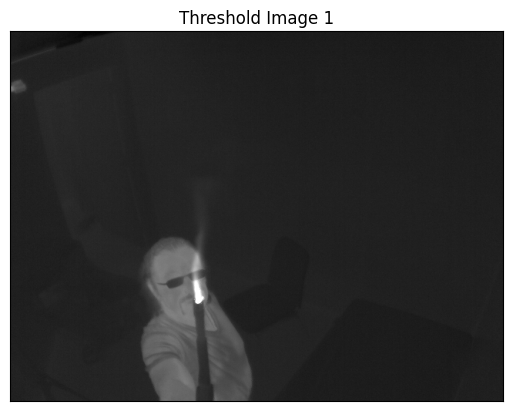

In [105]:
#threshold and normalize the image and convery to 8-bit for blob detection
max_val = 30200
min_val = 28160

ret, image_thres1 = cv2.threshold(image, max_val, max_val, cv2.THRESH_TRUNC)
show_image(image_thres1, "Threshold Image 1", True)

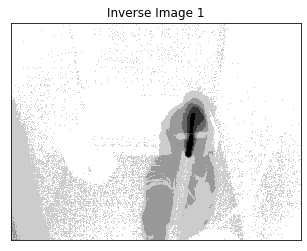

In [155]:
image_inv1 = cv2.bitwise_not(image_thres1)
show_image(image_inv1, "Inverse Image 1")

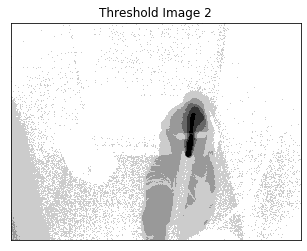

In [157]:
ret, image_thres2 = cv2.threshold(image_inv1, 65535 - min_val, 65535 - min_val, cv2.THRESH_TRUNC)
show_image(image_thres2, "Threshold Image 2")

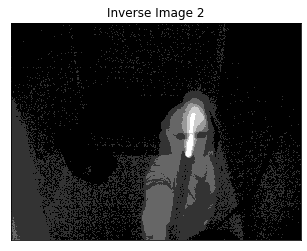

In [158]:
image_inv2 = cv2.bitwise_not(image_thres2)
show_image(image_inv2, "Inverse Image 2")

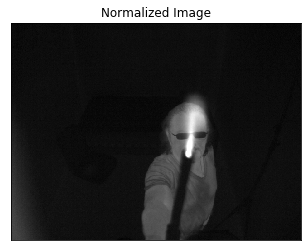

In [159]:
image_norm = ((image_inv2-min_val)/(max_val-min_val)) * 255.
image_norm = np.uint8(image_norm)
show_image(image_norm, "Normalized Image")

In [144]:
image_norm

array([[107.25 , 107.25 , 106.25 , ..., 105.125, 104.5  , 106.375],
       [107.75 , 106.625, 105.5  , ..., 107.625, 105.125, 106.25 ],
       [106.75 , 106.125, 105.75 , ..., 105.875, 103.375, 104.875],
       ...,
       [141.5  , 142.375, 142.125, ..., 107.25 , 105.5  , 106.375],
       [141.625, 141.125, 142.25 , ..., 106.25 , 104.5  , 108.375],
       [141.375, 142.125, 142.   , ..., 109.875, 106.   , 108.75 ]])

In [ ]:


#FILTER IMAGE   
#image = cv2.GaussianBlur(image,(5,5),0)

keypoints = detector.detect(cv2.bitwise_not(image))

if len(keypoints) != 0:
    detected = detected + 1

im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im_with_keypoints = cv2.putText(im_with_keypoints, filenames[i], (5,15),cv2.FONT_HERSHEY_SIMPLEX,.5,(255,0,0),1,2)
#out.write(im_with_keypoints)
i = i + 1
if len(keypoints) != 0:
    cv2.imshow("Keypoints", im_with_keypoints)
    while(1):
        wait_key = cv2.waitKeyEx(0)
        if wait_key == 2424832:
            i = i -1
            break
        elif wait_key == 2555904:
            break

    

In [ ]:
#out.release()
print("number of flames detected = " + str(detected))
print(detected/len(filenames) * 100)

In [ ]:
print("HOLLLAAA")